In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

chi19 = pd.read_csv("chi19_cleaned.csv")

#chi19.count()

In [95]:
chi19.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_lat,start_lng,end_lat,end_lng


In [2]:
chi19.drop(['Unnamed: 0'], axis = 1, inplace= True)
chi19.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_lat,start_lng,end_lat,end_lng
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,390.0,2019-01-01,1,0,2019-01-01,1,0,41.8915,-87.6268,41.8916,-87.6484
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St,4386,Subscriber,441.0,2019-01-01,1,0,2019-01-01,1,0,41.8847,-87.6277,41.8763,-87.6292
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St,1524,Subscriber,829.0,2019-01-01,1,0,2019-01-01,1,0,41.8582,-87.6565,NaN,NaN
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,1783.0,2019-01-01,1,0,2019-01-01,1,0,41.9227,-87.6972,41.9030,-87.6313
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,364.0,2019-01-01,1,0,2019-01-01,1,0,41.8969,-87.6217,41.8923,-87.6120


<H3>We would like to look at the number of rides per hour, grouping by weekdays and weekends to draw insight on users demandpatterns.</H3>

In [4]:
chi19_weekday = chi19[(chi19.Weekday_s < 5)]
chi19_weekend = chi19[(chi19.Weekday_s > 4)]

In [5]:
totaluse_hour = chi19.groupby(['Hour_s']).Hour_s.count().reset_index(name = "hour_start_frequency")
totaluse_hour

,Hour_s,hour_start_frequency
0,0,23958
1,1,14316
2,2,8605
3,3,5562
4,4,7765
5,5,35699
6,6,108073
7,7,237311
8,8,305162
9,9,163350


<AxesSubplot:xlabel='Hour_s', ylabel='hour_start_frequency'>

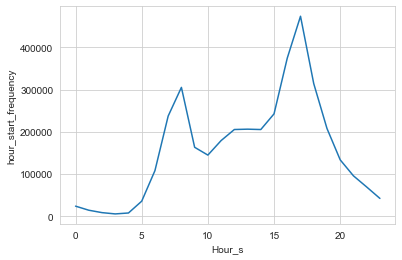

In [8]:
sns.lineplot(data=totaluse_hour, x="Hour_s", y="hour_start_frequency")

In [6]:
weekdayuse_hour = chi19_weekday.groupby(['Hour_s']).Hour_s.count().reset_index(name = "hour_start_frequency")
weekdayuse_hour

,Hour_s,hour_start_frequency
0,0,11929
1,1,6292
2,2,3453
3,3,2529
4,4,5855
5,5,32302
6,6,101059
7,7,223077
8,8,277628
9,9,119669


<AxesSubplot:xlabel='Hour_s', ylabel='hour_start_frequency'>

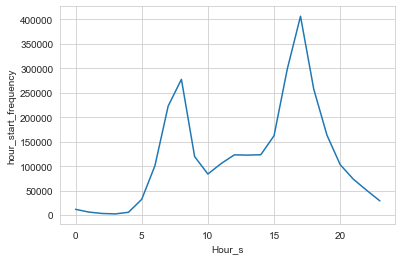

In [10]:
sns.lineplot(data=weekdayuse_hour, x="Hour_s", y="hour_start_frequency")

In [7]:
weekenduse_hour = chi19_weekend.groupby(['Hour_s']).Hour_s.count().reset_index(name = "hour_start_frequency")
weekenduse_hour

,Hour_s,hour_start_frequency
0,0,12029
1,1,8024
2,2,5152
3,3,3033
4,4,1910
5,5,3397
6,6,7014
7,7,14234
8,8,27534
9,9,43681


<AxesSubplot:xlabel='Hour_s', ylabel='hour_start_frequency'>

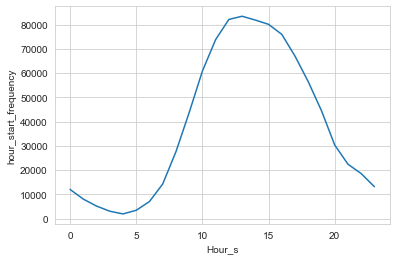

In [12]:
sns.lineplot(data=weekenduse_hour, x="Hour_s", y="hour_start_frequency")

Merge Weekday and weekend 

In [8]:
week = pd.merge(weekdayuse_hour, weekenduse_hour, on='Hour_s',  how='left')
week.columns = ['Hour_s', 'Frequency_Weekday', 'Frequency_Weekend']
week

,Hour_s,Frequency_Weekday,Frequency_Weekend
0,0,11929,12029
1,1,6292,8024
2,2,3453,5152
3,3,2529,3033
4,4,5855,1910
5,5,32302,3397
6,6,101059,7014
7,7,223077,14234
8,8,277628,27534
9,9,119669,43681


Merge total with weekday and weekend

In [9]:
week = pd.merge(week, totaluse_hour, on='Hour_s',  how='left')
week.columns = ['Hour_s', 'Frequency_Weekday', 'Frequency_Weekend', 'Frequency_Total']
week

,Hour_s,Frequency_Weekday,Frequency_Weekend,Frequency_Total
0,0,11929,12029,23958
1,1,6292,8024,14316
2,2,3453,5152,8605
3,3,2529,3033,5562
4,4,5855,1910,7765
5,5,32302,3397,35699
6,6,101059,7014,108073
7,7,223077,14234,237311
8,8,277628,27534,305162
9,9,119669,43681,163350


We do not need the hour column, we can use the index instead.

In [10]:
week.drop(['Hour_s'], axis = 1, inplace= True)
week

,Frequency_Weekday,Frequency_Weekend,Frequency_Total
0,11929,12029,23958
1,6292,8024,14316
2,3453,5152,8605
3,2529,3033,5562
4,5855,1910,7765
5,32302,3397,35699
6,101059,7014,108073
7,223077,14234,237311
8,277628,27534,305162
9,119669,43681,163350


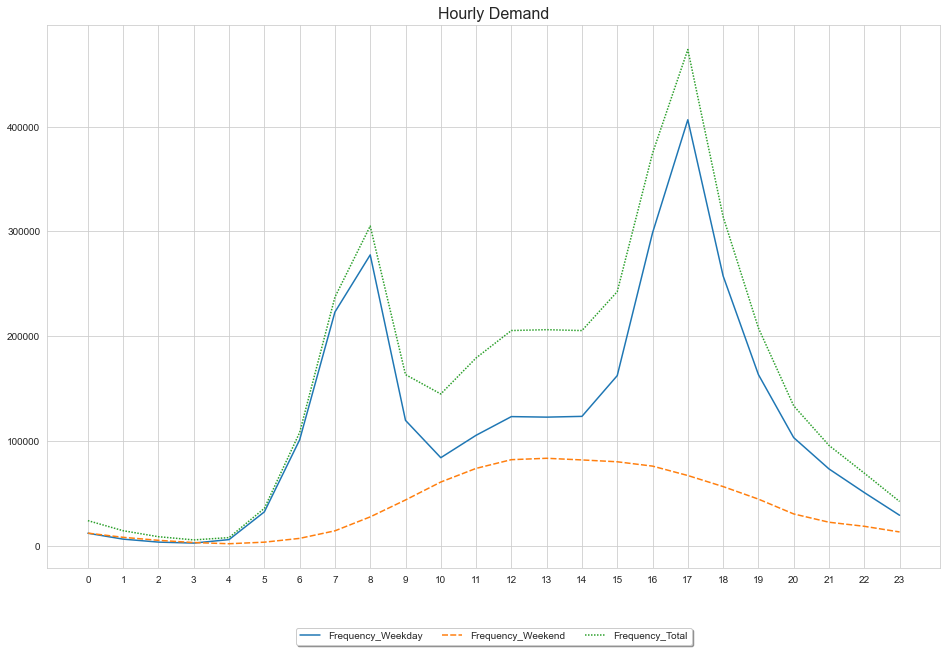

In [11]:
fig = plt.figure(figsize=(16,10))

sns.set_style("whitegrid")
plot = sns.lineplot(data=week)
plot.set_xticks(range(len(week)))
plot.set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])

plot.set_title("Hourly Demand",fontsize=16)

plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
fig.savefig("demand.pdf")

<H3>We would like to see if there is a difference in usage patterns between subscribers and customers. </H3>

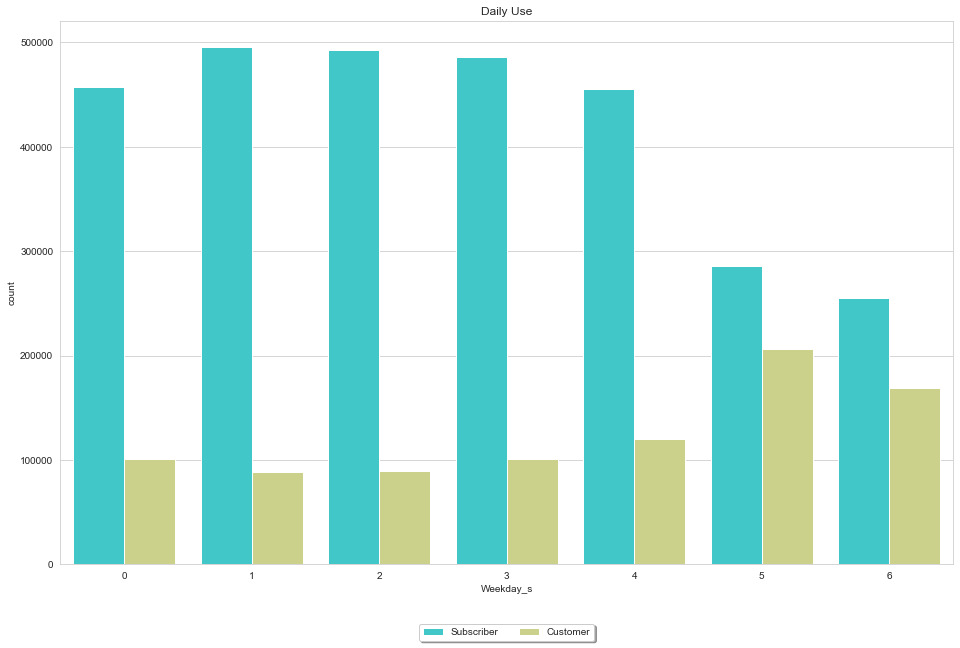

In [14]:
fig = plt.figure(figsize=(16,10))

sns.countplot(x = 'Weekday_s', hue = 'user_type', data = chi19, palette = 'rainbow')
plt.title('Daily Use')
#plot.set_xticks(7)
#plot.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
plt.show()
fig.savefig("differenceUserTypes.pdf")

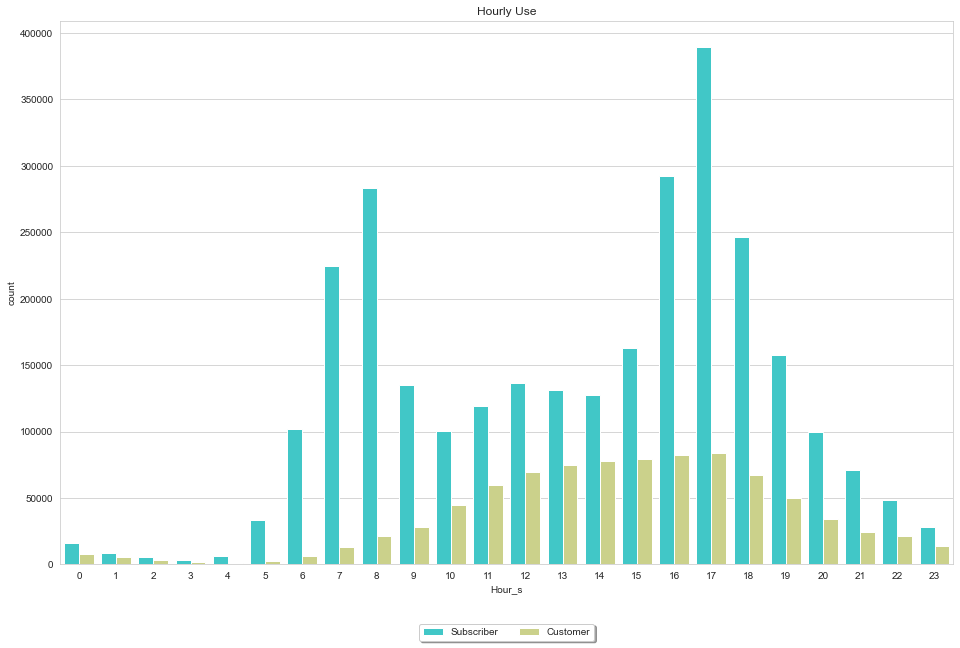

In [15]:
fig = plt.figure(figsize=(16,10))

sns.countplot(x = 'Hour_s', hue = 'user_type', data = chi19, palette = 'rainbow')
plt.title('Hourly Use')

plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
plt.show()
fig.savefig("hourlyUse_diffUserTypes.pdf")

Add additional month column:

In [16]:
chi19['month'] = pd.DatetimeIndex(chi19['start_time']).month
chi19

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_lat,start_lng,end_lat,end_lng,month
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,390.0,2019-01-01,1,0,2019-01-01,1,0,41.8915,-87.6268,41.8916,-87.6484,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St,4386,Subscriber,441.0,2019-01-01,1,0,2019-01-01,1,0,41.8847,-87.6277,41.8763,-87.6292,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St,1524,Subscriber,829.0,2019-01-01,1,0,2019-01-01,1,0,41.8582,-87.6565,NaN,NaN,1
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,1783.0,2019-01-01,1,0,2019-01-01,1,0,41.9227,-87.6972,41.9030,-87.6313,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,364.0,2019-01-01,1,0,2019-01-01,1,0,41.8969,-87.6217,41.8923,-87.6120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804515,2019-12-31 23:56:13,2020-01-01 00:15:45,112,225,Green St & Randolph St,Halsted St & Dickens Ave,2196,Subscriber,1172.0,2019-12-31,1,23,2020-01-01,2,0,41.8837,-87.6487,41.9199,-87.6488,12
3804516,2019-12-31 23:56:34,2020-01-01 00:22:08,90,90,Millennium Park,Millennium Park,4877,Subscriber,1534.0,2019-12-31,1,23,2020-01-01,2,0,41.8810,-87.6241,41.8810,-87.6241,12
3804517,2019-12-31 23:57:05,2020-01-01 00:05:46,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,863,Subscriber,521.0,2019-12-31,1,23,2020-01-01,2,0,41.8728,-87.6240,41.8860,-87.6241,12
3804518,2019-12-31 23:57:11,2020-01-01 00:05:45,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,2637,Subscriber,514.0,2019-12-31,1,23,2020-01-01,2,0,41.8728,-87.6240,41.8860,-87.6241,12


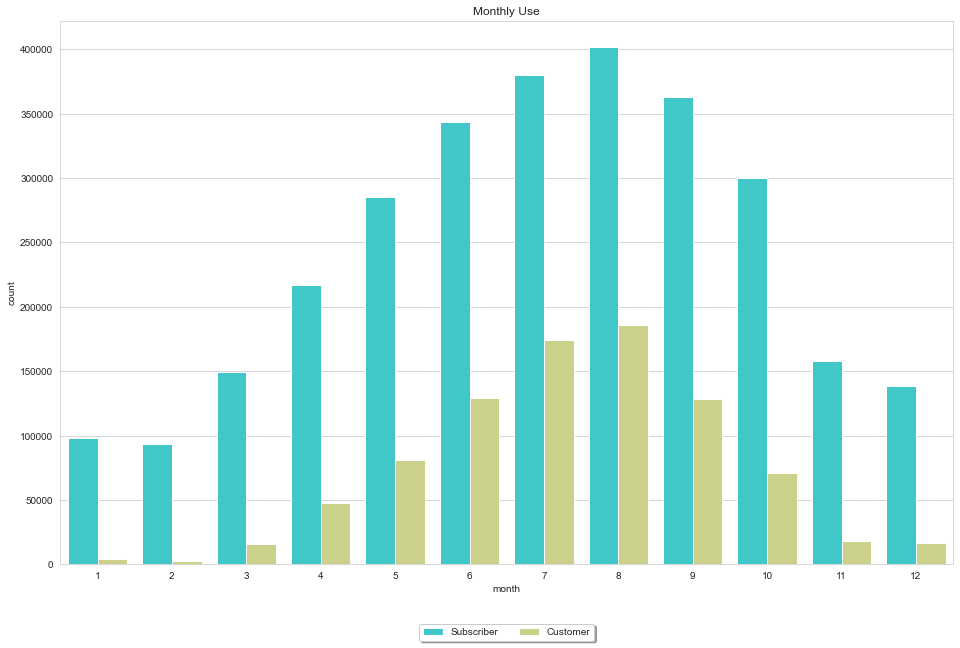

In [18]:
fig = plt.figure(figsize=(16,10))

sns.countplot(x = 'month', hue = 'user_type', data = chi19, palette = 'rainbow')
plt.title('Monthly Use')

plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
plt.show()
fig.savefig("monthlyUse.pdf")

<H4>Now we want to analyze the duration a bit futher.</H4>

In [137]:
chi19

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_lat,start_lng,end_lat,end_lng,month
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,390.0,2019-01-01,1,0,2019-01-01,1,0,41.8915,-87.6268,41.8916,-87.6484,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St,4386,Subscriber,441.0,2019-01-01,1,0,2019-01-01,1,0,41.8847,-87.6277,41.8763,-87.6292,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St,1524,Subscriber,829.0,2019-01-01,1,0,2019-01-01,1,0,41.8582,-87.6565,NaN,NaN,1
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,1783.0,2019-01-01,1,0,2019-01-01,1,0,41.9227,-87.6972,41.9030,-87.6313,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,364.0,2019-01-01,1,0,2019-01-01,1,0,41.8969,-87.6217,41.8923,-87.6120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804515,2019-12-31 23:56:13,2020-01-01 00:15:45,112,225,Green St & Randolph St,Halsted St & Dickens Ave,2196,Subscriber,1172.0,2019-12-31,1,23,2020-01-01,2,0,41.8837,-87.6487,41.9199,-87.6488,12
3804516,2019-12-31 23:56:34,2020-01-01 00:22:08,90,90,Millennium Park,Millennium Park,4877,Subscriber,1534.0,2019-12-31,1,23,2020-01-01,2,0,41.8810,-87.6241,41.8810,-87.6241,12
3804517,2019-12-31 23:57:05,2020-01-01 00:05:46,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,863,Subscriber,521.0,2019-12-31,1,23,2020-01-01,2,0,41.8728,-87.6240,41.8860,-87.6241,12
3804518,2019-12-31 23:57:11,2020-01-01 00:05:45,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,2637,Subscriber,514.0,2019-12-31,1,23,2020-01-01,2,0,41.8728,-87.6240,41.8860,-87.6241,12


In [19]:
chi19.rename(columns={'duration [s]':'duration_sec'}, inplace=True)
chi19

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_lat,start_lng,end_lat,end_lng,month
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,390.0,2019-01-01,1,0,2019-01-01,1,0,41.8915,-87.6268,41.8916,-87.6484,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St,4386,Subscriber,441.0,2019-01-01,1,0,2019-01-01,1,0,41.8847,-87.6277,41.8763,-87.6292,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St,1524,Subscriber,829.0,2019-01-01,1,0,2019-01-01,1,0,41.8582,-87.6565,NaN,NaN,1
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,1783.0,2019-01-01,1,0,2019-01-01,1,0,41.9227,-87.6972,41.9030,-87.6313,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,364.0,2019-01-01,1,0,2019-01-01,1,0,41.8969,-87.6217,41.8923,-87.6120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804515,2019-12-31 23:56:13,2020-01-01 00:15:45,112,225,Green St & Randolph St,Halsted St & Dickens Ave,2196,Subscriber,1172.0,2019-12-31,1,23,2020-01-01,2,0,41.8837,-87.6487,41.9199,-87.6488,12
3804516,2019-12-31 23:56:34,2020-01-01 00:22:08,90,90,Millennium Park,Millennium Park,4877,Subscriber,1534.0,2019-12-31,1,23,2020-01-01,2,0,41.8810,-87.6241,41.8810,-87.6241,12
3804517,2019-12-31 23:57:05,2020-01-01 00:05:46,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,863,Subscriber,521.0,2019-12-31,1,23,2020-01-01,2,0,41.8728,-87.6240,41.8860,-87.6241,12
3804518,2019-12-31 23:57:11,2020-01-01 00:05:45,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,2637,Subscriber,514.0,2019-12-31,1,23,2020-01-01,2,0,41.8728,-87.6240,41.8860,-87.6241,12


In [21]:
chi19_durationBelow5 = chi19[(chi19.duration_sec < 300)]
chi19_durationBelow5

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_lat,start_lng,end_lat,end_lng,month
5,2019-01-01 00:15:33,2019-01-01 00:19:09,98,49,LaSalle St & Washington St,Dearborn St & Monroe St,2437,Subscriber,216.0,2019-01-01,1,0,2019-01-01,1,0,41.8827,-87.6325,41.8813,-87.6295,1
6,2019-01-01 00:16:06,2019-01-01 00:19:03,98,49,LaSalle St & Washington St,Dearborn St & Monroe St,2708,Subscriber,177.0,2019-01-01,1,0,2019-01-01,1,0,41.8827,-87.6325,41.8813,-87.6295,1
7,2019-01-01 00:18:41,2019-01-01 00:20:21,211,142,St. Clair St & Erie St,McClurg Ct & Erie St,2796,Subscriber,100.0,2019-01-01,1,0,2019-01-01,1,0,41.8944,-87.6227,41.8945,-87.6179,1
24,2019-01-01 00:34:35,2019-01-01 00:38:25,520,523,Greenview Ave & Jarvis Ave,Eastlake Ter & Rogers Ave,3722,Subscriber,230.0,2019-01-01,1,0,2019-01-01,1,0,42.0160,-87.6686,42.0209,-87.6651,1
30,2019-01-01 00:45:45,2019-01-01 00:50:00,418,121,Ellis Ave & 53rd St,Blackstone Ave & Hyde Park Blvd,1158,Subscriber,255.0,2019-01-01,1,0,2019-01-01,1,0,41.7993,-87.6010,41.8026,-87.5904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804494,2019-12-31 23:35:20,2019-12-31 23:39:45,417,345,Cornell Ave & Hyde Park Blvd,Lake Park Ave & 56th St,1914,Subscriber,265.0,2019-12-31,1,23,2019-12-31,1,23,41.8024,-87.5869,41.7932,-87.5878,12
3804504,2019-12-31 23:45:35,2019-12-31 23:48:17,140,161,Dearborn Pkwy & Delaware Pl,Rush St & Superior St,2076,Subscriber,162.0,2019-12-31,1,23,2019-12-31,1,23,41.8990,-87.6299,41.8958,-87.6259,12
3804510,2019-12-31 23:50:05,2019-12-31 23:53:33,624,81,Dearborn St & Van Buren St,Daley Center Plaza,1720,Subscriber,208.0,2019-12-31,1,23,2019-12-31,1,23,41.8763,-87.6292,41.8842,-87.6296,12
3804512,2019-12-31 23:51:19,2019-12-31 23:55:33,638,134,Clinton St & Jackson Blvd,Peoria St & Jackson Blvd,5654,Subscriber,254.0,2019-12-31,1,23,2019-12-31,1,23,41.8781,-87.6398,41.8776,-87.6496,12


In [22]:
chi19_durationBelow15 = chi19[(chi19.duration_sec > 300) & (chi19.duration_sec < 900)]
chi19_durationBelow15

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_lat,start_lng,end_lat,end_lng,month
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,390.0,2019-01-01,1,0,2019-01-01,1,0,41.8915,-87.6268,41.8916,-87.6484,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St,4386,Subscriber,441.0,2019-01-01,1,0,2019-01-01,1,0,41.8847,-87.6277,41.8763,-87.6292,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St,1524,Subscriber,829.0,2019-01-01,1,0,2019-01-01,1,0,41.8582,-87.6565,NaN,NaN,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,364.0,2019-01-01,1,0,2019-01-01,1,0,41.8969,-87.6217,41.8923,-87.6120,1
9,2019-01-01 00:19:18,2019-01-01 00:24:54,268,141,Lake Shore Dr & North Blvd,Clark St & Lincoln Ave,3939,Subscriber,336.0,2019-01-01,1,0,2019-01-01,1,0,41.9117,-87.6268,41.9157,-87.6346,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804505,2019-12-31 23:46:19,2019-12-31 23:53:51,641,259,Central Park Ave & Bloomingdale Ave,California Ave & Francis Pl,41,Subscriber,452.0,2019-12-31,1,23,2019-12-31,1,23,41.9142,-87.7168,NaN,NaN,12
3804511,2019-12-31 23:50:19,2019-12-31 23:55:37,255,3,Indiana Ave & Roosevelt Rd,Shedd Aquarium,4561,Subscriber,318.0,2019-12-31,1,23,2019-12-31,1,23,41.8679,-87.6230,41.8672,-87.6154,12
3804513,2019-12-31 23:54:38,2020-01-01 00:04:38,455,467,Maplewood Ave & Peterson Ave,Western Ave & Lunt Ave,606,Subscriber,600.0,2019-12-31,1,23,2020-01-01,2,0,41.9902,-87.6934,42.0086,-87.6905,12
3804517,2019-12-31 23:57:05,2020-01-01 00:05:46,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,863,Subscriber,521.0,2019-12-31,1,23,2020-01-01,2,0,41.8728,-87.6240,41.8860,-87.6241,12


In [23]:
chi19_durationBelow30 = chi19[(chi19.duration_sec > 900) & (chi19.duration_sec < 1800)]
chi19_durationBelow30

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_lat,start_lng,end_lat,end_lng,month
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,1783.0,2019-01-01,1,0,2019-01-01,1,0,41.9227,-87.6972,41.9030,-87.6313,1
8,2019-01-01 00:18:43,2019-01-01 00:47:30,150,148,Fort Dearborn Dr & 31st St,State St & 33rd St,6205,Subscriber,1727.0,2019-01-01,1,0,2019-01-01,1,0,41.8386,-87.6082,41.8347,-87.6258,1
14,2019-01-01 00:23:54,2019-01-01 00:39:00,289,324,Wells St & Concord Ln,Stockton Dr & Wrightwood Ave,5019,Subscriber,906.0,2019-01-01,1,0,2019-01-01,1,0,41.9121,-87.6347,41.9313,-87.6387,1
17,2019-01-01 00:24:27,2019-01-01 00:47:03,268,319,Lake Shore Dr & North Blvd,Greenview Ave & Diversey Pkwy,5777,Customer,1356.0,2019-01-01,1,0,2019-01-01,1,0,41.9117,-87.6268,41.9326,-87.6659,1
19,2019-01-01 00:29:21,2019-01-01 00:45:21,47,111,State St & Kinzie St,Sedgwick St & Huron St,140,Subscriber,960.0,2019-01-01,1,0,2019-01-01,1,0,41.8892,-87.6278,41.8947,-87.6384,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804496,2019-12-31 23:36:30,2019-12-31 23:56:19,90,90,Millennium Park,Millennium Park,4877,Subscriber,1189.0,2019-12-31,1,23,2019-12-31,1,23,41.8810,-87.6241,41.8810,-87.6241,12
3804506,2019-12-31 23:49:38,2020-01-01 00:15:19,90,76,Millennium Park,Lake Shore Dr & Monroe St,2936,Customer,1541.0,2019-12-31,1,23,2020-01-01,2,0,41.8810,-87.6241,41.8810,-87.6167,12
3804514,2019-12-31 23:54:54,2020-01-01 00:22:02,145,25,Mies van der Rohe Way & Chestnut St,Michigan Ave & Pearson St,5996,Subscriber,1628.0,2019-12-31,1,23,2020-01-01,2,0,41.8986,-87.6219,41.8977,-87.6235,12
3804515,2019-12-31 23:56:13,2020-01-01 00:15:45,112,225,Green St & Randolph St,Halsted St & Dickens Ave,2196,Subscriber,1172.0,2019-12-31,1,23,2020-01-01,2,0,41.8837,-87.6487,41.9199,-87.6488,12


In [24]:
chi19_durationBelow60 = chi19[(chi19.duration_sec > 1800) & (chi19.duration_sec < 3600)]
chi19_durationBelow60

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_lat,start_lng,end_lat,end_lng,month
18,2019-01-01 00:29:19,2019-01-01 01:08:12,35,39,Streeter Dr & Grand Ave,Wabash Ave & Adams St,3914,Customer,2333.0,2019-01-01,1,0,2019-01-01,1,1,41.8923,-87.6120,41.8795,-87.6257,1
20,2019-01-01 00:29:28,2019-01-01 01:07:49,35,39,Streeter Dr & Grand Ave,Wabash Ave & Adams St,3355,Customer,2301.0,2019-01-01,1,0,2019-01-01,1,1,41.8923,-87.6120,41.8795,-87.6257,1
29,2019-01-01 00:45:37,2019-01-01 01:17:51,464,30,Damen Ave & Foster Ave,Ashland Ave & Augusta Blvd,5583,Subscriber,1934.0,2019-01-01,1,0,2019-01-01,1,1,41.9756,-87.6795,41.8996,-87.6677,1
57,2019-01-01 01:23:13,2019-01-01 02:07:47,260,240,Kedzie Ave & Milwaukee Ave,Sheridan Rd & Irving Park Rd,628,Customer,2674.0,2019-01-01,1,1,2019-01-01,1,2,41.9296,-87.7079,41.9542,-87.6544,1
59,2019-01-01 01:25:01,2019-01-01 02:04:22,199,106,Wabash Ave & Grand Ave,State St & Pearson St,3238,Subscriber,2361.0,2019-01-01,1,1,2019-01-01,1,2,41.8915,-87.6268,41.8974,-87.6287,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804500,2019-12-31 23:42:11,2020-01-01 00:24:21,145,26,Mies van der Rohe Way & Chestnut St,McClurg Ct & Illinois St,389,Subscriber,2530.0,2019-12-31,1,23,2020-01-01,2,0,41.8986,-87.6219,41.8904,-87.6175,12
3804501,2019-12-31 23:42:41,2020-01-01 00:39:20,232,232,Pine Grove Ave & Waveland Ave,Pine Grove Ave & Waveland Ave,3701,Subscriber,3399.0,2019-12-31,1,23,2020-01-01,2,0,41.9493,-87.6463,41.9493,-87.6463,12
3804507,2019-12-31 23:49:43,2020-01-01 00:21:51,90,76,Millennium Park,Lake Shore Dr & Monroe St,1671,Customer,1928.0,2019-12-31,1,23,2020-01-01,2,0,41.8810,-87.6241,41.8810,-87.6167,12
3804508,2019-12-31 23:49:51,2020-01-01 00:22:08,90,76,Millennium Park,Lake Shore Dr & Monroe St,3925,Customer,1937.0,2019-12-31,1,23,2020-01-01,2,0,41.8810,-87.6241,41.8810,-87.6167,12


In [25]:
chi19_durationAbove60 = chi19[(chi19.duration_sec > 3600)]
chi19_durationAbove60

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_lat,start_lng,end_lat,end_lng,month
225,2019-01-01 09:06:33,2019-01-01 10:07:51,454,454,Broadway & Granville Ave,Broadway & Granville Ave,1076,Customer,3678.0,2019-01-01,1,9,2019-01-01,1,10,41.9948,-87.6603,41.9948,-87.6603,1
295,2019-01-01 10:11:08,2019-01-01 12:29:19,454,344,Broadway & Granville Ave,Ravenswood Ave & Lawrence Ave,1076,Customer,8291.0,2019-01-01,1,10,2019-01-01,1,12,41.9948,-87.6603,41.9691,-87.6742,1
306,2019-01-01 10:22:26,2019-01-02 10:08:20,43,43,Michigan Ave & Washington St,Michigan Ave & Washington St,1164,Subscriber,85554.0,2019-01-01,1,10,2019-01-02,2,10,41.8840,-87.6247,41.8840,-87.6247,1
385,2019-01-01 11:22:38,2019-01-01 13:28:00,354,523,Sheridan Rd & Greenleaf Ave,Eastlake Ter & Rogers Ave,3703,Customer,7522.0,2019-01-01,1,11,2019-01-01,1,13,42.0106,-87.6624,42.0209,-87.6651,1
387,2019-01-01 11:23:15,2019-01-01 13:18:12,199,199,Wabash Ave & Grand Ave,Wabash Ave & Grand Ave,2732,Customer,6897.0,2019-01-01,1,11,2019-01-01,1,13,41.8915,-87.6268,41.8915,-87.6268,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804321,2019-12-31 19:34:00,2019-12-31 21:07:06,627,81,LaSalle Dr & Huron St,Daley Center Plaza,1034,Customer,5586.0,2019-12-31,1,19,2019-12-31,1,21,41.8949,-87.6323,41.8842,-87.6296,12
3804487,2019-12-31 23:28:43,2020-01-01 01:27:24,417,420,Cornell Ave & Hyde Park Blvd,Ellis Ave & 55th St,6011,Customer,7121.0,2019-12-31,1,23,2020-01-01,2,1,41.8024,-87.5869,41.7943,-87.6015,12
3804488,2019-12-31 23:29:12,2020-01-01 01:27:26,417,420,Cornell Ave & Hyde Park Blvd,Ellis Ave & 55th St,957,Customer,7094.0,2019-12-31,1,23,2020-01-01,2,1,41.8024,-87.5869,41.7943,-87.6015,12
3804489,2019-12-31 23:29:21,2020-01-01 00:59:36,417,248,Cornell Ave & Hyde Park Blvd,Woodlawn Ave & 55th St,626,Customer,5415.0,2019-12-31,1,23,2020-01-01,2,0,41.8024,-87.5869,41.7953,-87.5965,12


In [26]:
chi19_durationBelow5 = chi19_durationBelow5.groupby(['Weekday_s']).Weekday_s.count().reset_index(name = "count_of_rides_under_5min")
chi19_durationBelow5

,Weekday_s,count_of_rides_under_5min
0,0,80006
1,1,86551
2,2,85618
3,3,85772
4,4,82854
5,5,46746
6,6,43712


In [27]:
chi19_durationBelow15 = chi19_durationBelow15.groupby(['Weekday_s']).Weekday_s.count().reset_index(name = "count_of_rides_under_15min")
chi19_durationBelow15

,Weekday_s,count_of_rides_under_15min
0,0,277356
1,1,298647
2,2,297234
3,3,295496
4,4,281795
5,5,183986
6,6,162406


In [28]:
chi19_durationBelow30 = chi19_durationBelow30.groupby(['Weekday_s']).Weekday_s.count().reset_index(name = "count_of_rides_under_30min")
chi19_durationBelow30

,Weekday_s,count_of_rides_under_30min
0,0,134593
1,1,139676
2,2,140933
3,3,141508
4,4,139168
5,5,143787
6,6,123407


In [29]:
chi19_durationBelow60 = chi19_durationBelow60.groupby(['Weekday_s']).Weekday_s.count().reset_index(name = "count_of_rides_under_60min")
chi19_durationBelow60

,Weekday_s,count_of_rides_under_60min
0,0,47158
1,1,43686
2,2,43485
3,3,46322
4,4,50968
5,5,77359
6,6,62052


In [30]:
chi19_durationAbove60 = chi19_durationAbove60.groupby(['Weekday_s']).Weekday_s.count().reset_index(name = "count_of_rides_over_60min")
chi19_durationAbove60

,Weekday_s,count_of_rides_over_60min
0,0,18463
1,1,14453
2,2,14169
3,3,16396
4,4,20416
5,5,39984
6,6,31980


In [31]:
mergedDurations = pd.merge(
                            (pd.merge(pd.merge(chi19_durationBelow5, chi19_durationBelow15, on = "Weekday_s", how="left"), 
                            pd.merge(chi19_durationBelow30, chi19_durationBelow60, on = "Weekday_s", how="left"), on ="Weekday_s",  how='left')), chi19_durationAbove60,on ="Weekday_s",  how='left') 
mergedDurations

,Weekday_s,count_of_rides_under_5min,count_of_rides_under_15min,count_of_rides_under_30min,count_of_rides_under_60min,count_of_rides_over_60min
0,0,80006,277356,134593,47158,18463
1,1,86551,298647,139676,43686,14453
2,2,85618,297234,140933,43485,14169
3,3,85772,295496,141508,46322,16396
4,4,82854,281795,139168,50968,20416
5,5,46746,183986,143787,77359,39984
6,6,43712,162406,123407,62052,31980


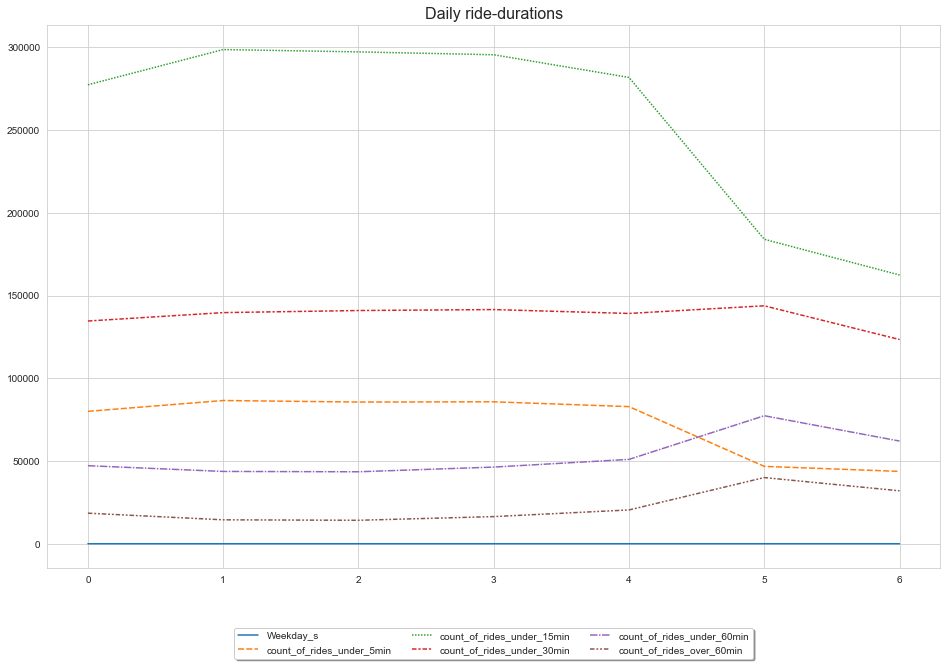

In [34]:
fig = plt.figure(figsize=(16,10))

sns.set_style("whitegrid")
plot = sns.lineplot(data=mergedDurations)
#plot.set_xticks(range(len(mergedDurations)))
#plot.set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])

plot.set_title("Daily ride-durations",fontsize=16)

plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
fig.savefig("dailyRideDurations.pdf")